In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
visa_df=pd.read_csv('Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## Box plot

- Box plot is used for outlayes analysis



**outlier**
- very very huge analysis
- very very small analysis
- which pull the data in any side of three distrubutions
- Mild outliers
    - q1-1.5 * q3 and q1+1.5 * q3
- Strong outlayers
   - q1-3 * q3 and q1+3 * q3

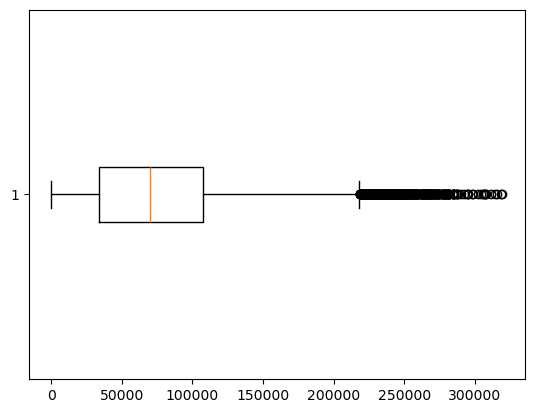

In [3]:
plt.boxplot(visa_df['prevailing_wage'],vert=False) #vert : bool, default: True
    # If `True`, draws vertical boxes.
    # If `False`, draw horizontal boxes.
plt.show()

<Axes: xlabel='prevailing_wage'>

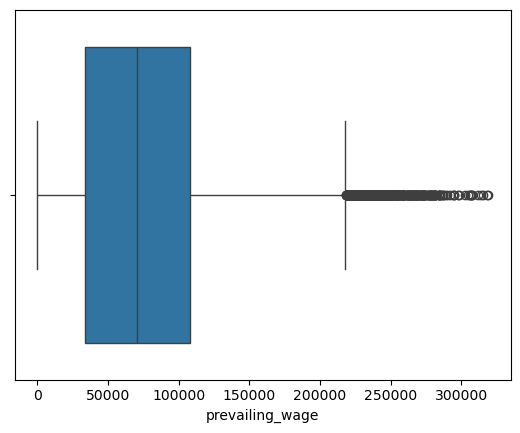

In [4]:
sns.boxplot(visa_df['prevailing_wage'],
           orient='h')

Text(0, 0.5, 'count')

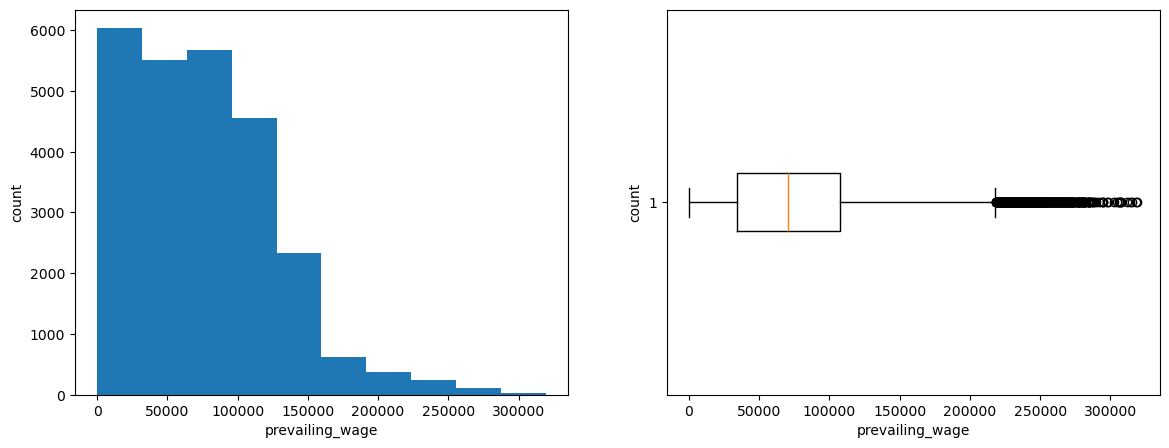

In [5]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.xlabel('prevailing_wage')
plt.ylabel('count')
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.xlabel('prevailing_wage')
plt.ylabel('count')

**Finding the outliers**
- Outlayers are available less than    q1-1.5 * IQR
- Outlayers are available greater than q1+1.5 * IQR 

- Step 1:
   - Calculate Q1
   - Calculate Q3
   - IQR= Q3 - Q1

- Step 2:
   - LB= Q1-1.5 * IQR
   - UB= Q3+1.5 * IQR

- Step3:
    - con1=visa_df['prevailing_wage']<LB
    - con1=visa_df['prevailing_wage']>UB
    - Apply OR operator and get the data 


In [6]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
Q1,Q3
IQR=Q3-Q1
print('IQR:',IQR)
#Ste2
LB= Q1-1.5 * (IQR)
UB= Q3+1.5 *(IQR)
print('LB:',LB,UB)
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

IQR: 73720.03
LB: -76564.565 218315.555


427

In [7]:
# For Non  outlayers
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

In [23]:
##



**Histgram and boxplot for non outlayers data**

Text(0, 0.5, 'count')

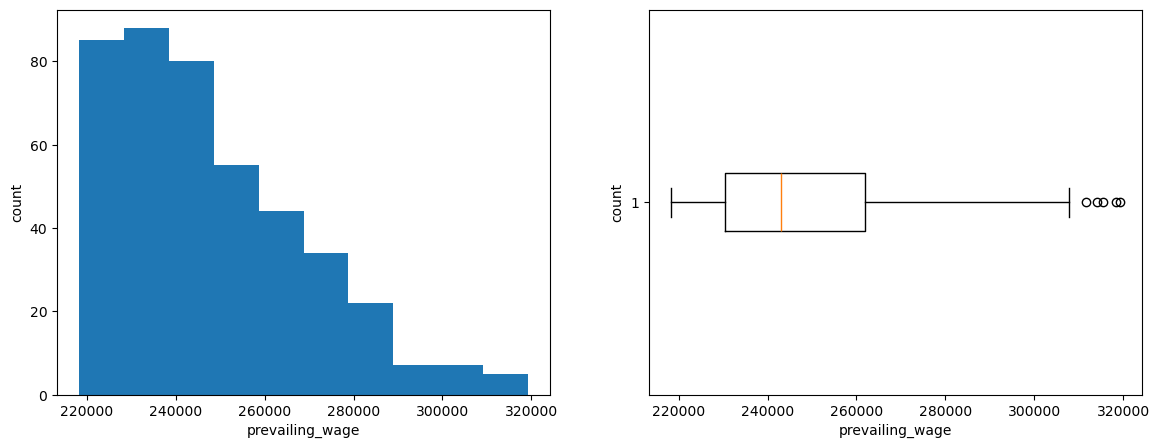

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(outliers_data['prevailing_wage'])

plt.xlabel('prevailing_wage')
plt.ylabel('count')
plt.subplot(1,2,2).boxplot(outliers_data['prevailing_wage'],vert=False)
plt.xlabel('prevailing_wage')
plt.ylabel('count')

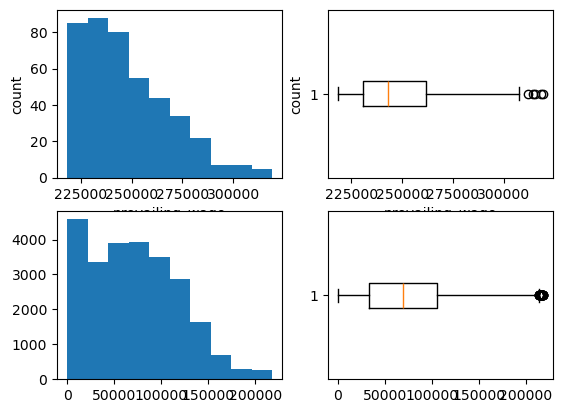

In [10]:
# plt.figure(figsize=(14,5))
plt.subplot(2,2,1).hist(outliers_data['prevailing_wage'])
plt.xlabel('prevailing_wage')
plt.ylabel('count')
plt.subplot(2,2,2).boxplot(outliers_data['prevailing_wage'],vert=False)
plt.xlabel('prevailing_wage')
plt.ylabel('count')
plt.subplot(2,2,3).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,4).boxplot(non_outliers_data['prevailing_wage'],vert=False)
plt.show()

Text(0, 0.5, 'count')

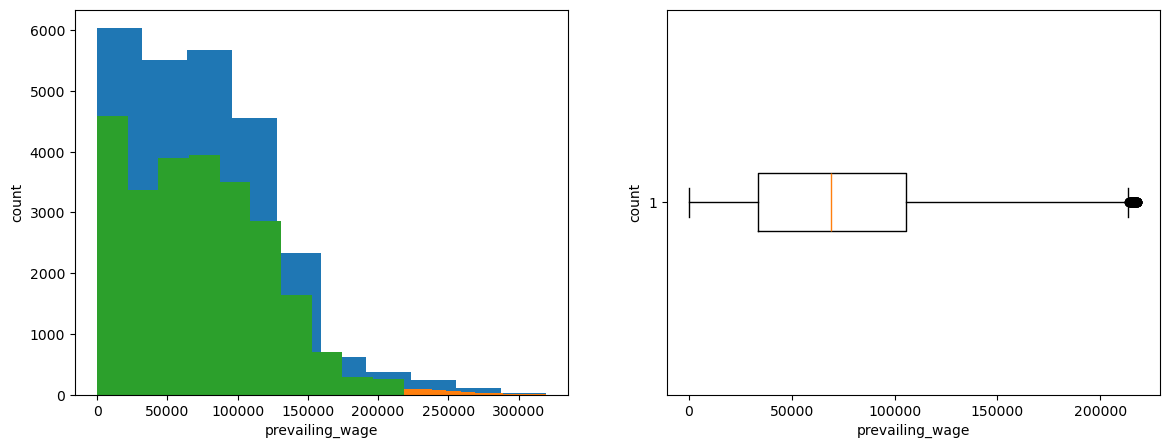

In [61]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(outliers_data['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.xlabel('prevailing_wage')
plt.ylabel('count')
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'],vert=False)
plt.xlabel('prevailing_wage')
plt.ylabel('count')


**HOW to deal the outlairs**
- **Method-1: Drop the outliers**
  - Drop the outliers is not a good idea
  - When you drop outlier, data will loose
  - x% of 427/25480
  - it is 1.7% of total data, here here it is fine we can drop the outlaiers
- **Method-2: Fill with median**


- **Method-3: Cap the values with Q1 and Q3**

**Fill with median**
- create a empty list
- iterate the visa_df['prevailing_wage'].values
- if each value $<lb or >ub$ then append with median values
- otherwise append with i

{'whiskers': [<matplotlib.lines.Line2D at 0x202556c60d0>,
 'caps': [<matplotlib.lines.Line2D at 0x202556c75d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x202556c5590>],
 'medians': [<matplotlib.lines.Line2D at 0x202556d4b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x202556d5610>],
 'means': []}

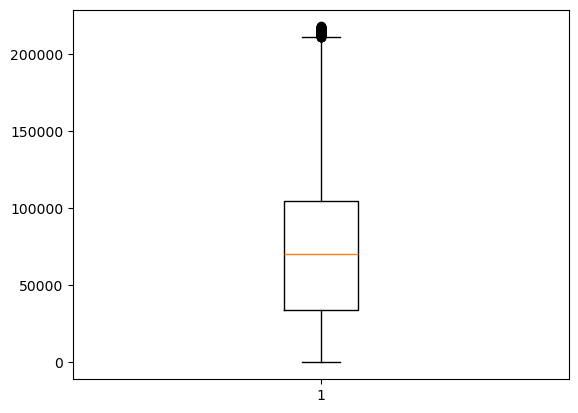

In [12]:
l1=[]
p_df=visa_df['prevailing_wage']
median_val=visa_df['prevailing_wage'].median()
for i in p_df.values:
    if i<LB or i>UB:
        l1.append(median_val)
    else:
        l1.append(i)
#l1

visa_df_copy=visa_df.copy()  # because in new list l1 data len is less than original data so we make the copy data
visa_df_copy['prevailing_wage']=l1
plt.boxplot(visa_df_copy['prevailing_wage'])

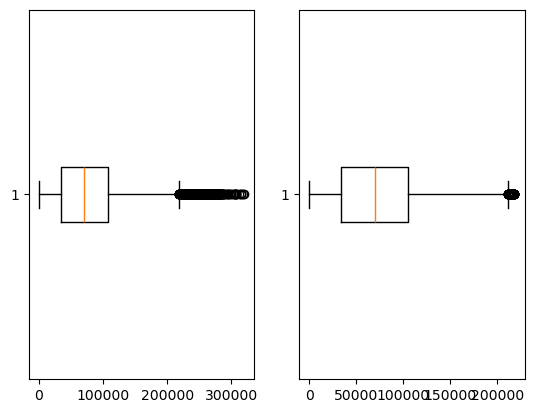

In [83]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'],vert=False)
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'],vert=False)
plt.show()

**np.where**
- It is used for binaru conditions
- It has 3 arguments
  - condition
  - value if condition is $True$
  - value if condition id $False$

In [13]:
d={"sub":["DS","ML","CS"],
  "Marks":[100,150,20]}
data=pd.DataFrame(d)

In [14]:
#Task 
# Marks column replace with 1 when value >100
# Otherwise keep as it is

In [15]:
con=data['Marks']>100
l=np.where(con,1,data['Marks'])
l

array([100,   1,  20], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x20255781590>,
 'caps': [<matplotlib.lines.Line2D at 0x20255782d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x202557808d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20255788290>],
 'fliers': [<matplotlib.lines.Line2D at 0x20255788cd0>],
 'means': []}

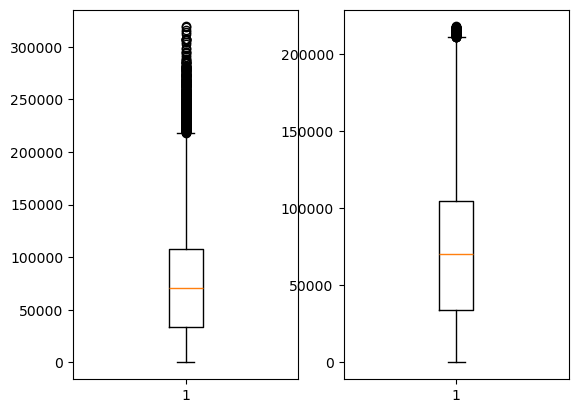

In [16]:
# applyin visa_df
#visa_df: Original data
#visa_df_copy: median values in place of outlaiers
con1= visa_df['prevailing_wage']<LB 
con2= visa_df['prevailing_wage']>UB
con=con1|con2
median=visa_df['prevailing_wage'].median()
l=np.where(con,median,visa_df['prevailing_wage'])
l
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(l)